In [4]:
# if smoothed:
#     calcium_data = dataset[worm]["smooth_calcium_data"]
#     residual_calcium = dataset[worm]["residual_smooth_calcium"]
# else:
#     calcium_data = dataset[worm]["calcium_data"]
#     residual_calcium = dataset[worm]["residual_calcium"]

# file = open("model.pickle", "rb")
# model = torch.load(file)

from train._utils import *



dataset = get_dataset(OmegaConf.load("../../conf/dataset.yaml"))

model = get_model(OmegaConf.load("../../conf/model.yaml"))
model.load_state_dict((torch.load("model_LR0.1_E500.pickle")))
model.eval()
calcium_data = dataset["worm0"]["calcium_data"]

mask_test = dataset["worm0"]["named_neurons_mask"]

# visualization of prediction
pred = []
target = []
X_test = []
Y_test = []


time_step = 10

num_neurons = 302
for i in range(time_step, calcium_data.shape[0] - 1):
    X, Y = calcium_data[i - time_step:i, :num_neurons], calcium_data[i - time_step + 1:i + 1, :num_neurons]
    X_test.append(np.array(X))
    Y_test.append(np.array(Y))

X_test = torch.tensor(X_test)
Y_test = torch.tensor(Y_test)

print(X_test.shape, Y_test.shape, "---")

mask_test = mask_test.repeat(Y_test.shape[1], 1)
mask_test = mask_test.unsqueeze(0)
mask_test = mask_test.repeat(Y_test.shape[0], 1, 1)
# print(mask_test)
Y_test = Y_test * mask_test
Y_pred = model(X_test * mask_test)

Y_test = Y_test.detach().numpy()
Y_pred = Y_pred.detach().numpy()

print(dataset["worm0"]["num_named_neurons"], dataset["worm0"]["num_neurons"])

count = dataset["worm0"]["named_neurons_mask"].sum()
print(count)

# count = 0
# for i in range(0, Y_test.shape[2]):
#     # print(i+count)
#     if i+count >= dataset["worm0"]["named_neurons_mask"].shape[0]: break
#     if i >= Y_test.shape[2]: break
#     if dataset["worm0"]["named_neurons_mask"][i+count].item() is False:
#         Y_test = np.delete(Y_test, i, axis=2)
#         Y_pred = np.delete(Y_pred, i, axis=2)
#         i -= 1
#         count += 1


Y_test = torch.tensor(Y_test)
Y_pred = torch.tensor(Y_pred)

print(Y_pred.shape, Y_test.shape)

Chosen dataset(s): ['sine_noise']
Num. worms: 6
Worm names: ['worm0', 'worm1', 'worm2', 'worm3', 'worm4', 'worm5']


Model: NetworkLSTM(
  (lstm): LSTM(302, 302, batch_first=True)
  (linear): Linear(in_features=302, out_features=302, bias=True)
)

torch.Size([3301, 10, 302]) torch.Size([3301, 10, 302]) ---
202 302
tensor(202)
torch.Size([3301, 10, 302]) torch.Size([3301, 10, 302])


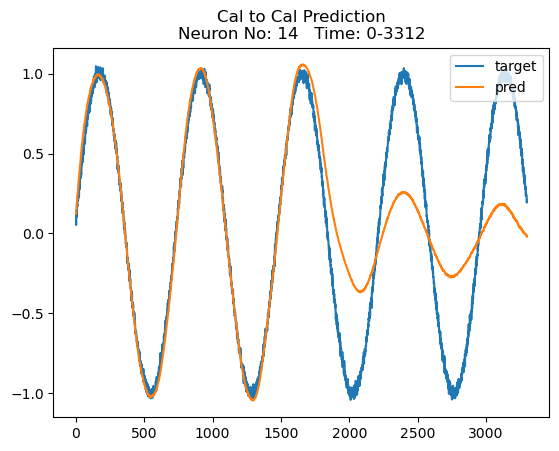

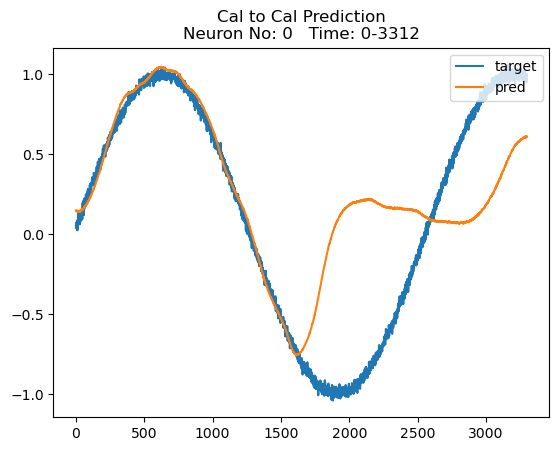

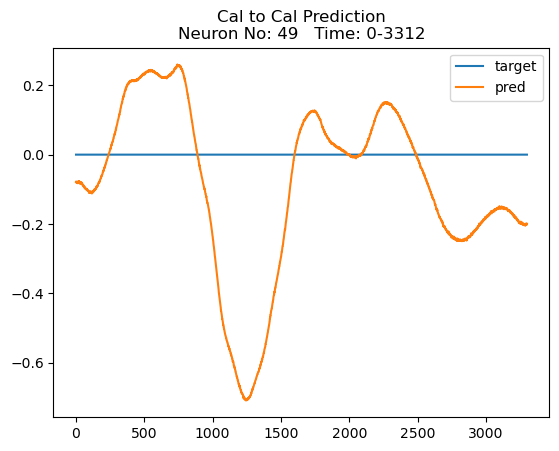

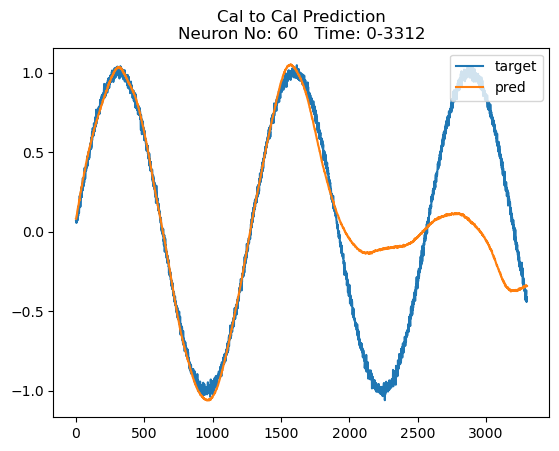

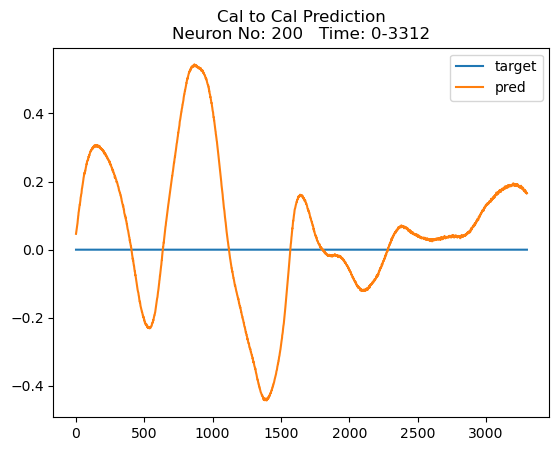

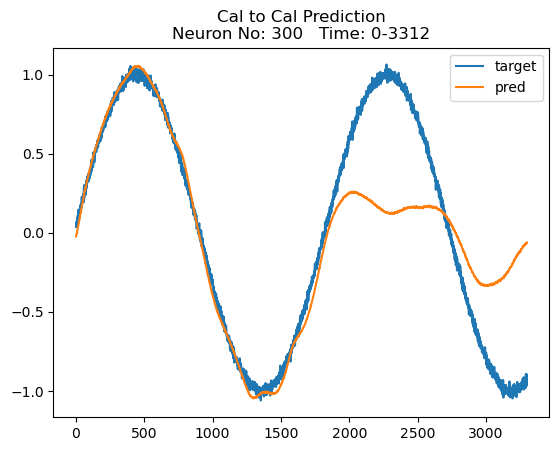

In [17]:
def draw_pic(Y_pred, Y_test, num, time):
    plt.plot(Y_test.detach().numpy()[:time, -1, num])
    plt.plot(Y_pred.detach().numpy()[:time, -1, num])
    plt.legend(["target", "pred"], loc="upper right")
    plt.title("Cal to Cal Prediction\n" + "Neuron No: " + str(num) + "   Time: 0-" + str(time))
    plt.show()



draw_pic(Y_pred, Y_test, 14, dataset["worm0"]["max_time"])

draw_pic(Y_pred, Y_test, 0, dataset["worm0"]["max_time"])
draw_pic(Y_pred, Y_test, 49, dataset["worm0"]["max_time"])
draw_pic(Y_pred, Y_test, 60, dataset["worm0"]["max_time"])
draw_pic(Y_pred, Y_test, 200, dataset["worm0"]["max_time"])
draw_pic(Y_pred, Y_test, 300, dataset["worm0"]["max_time"])



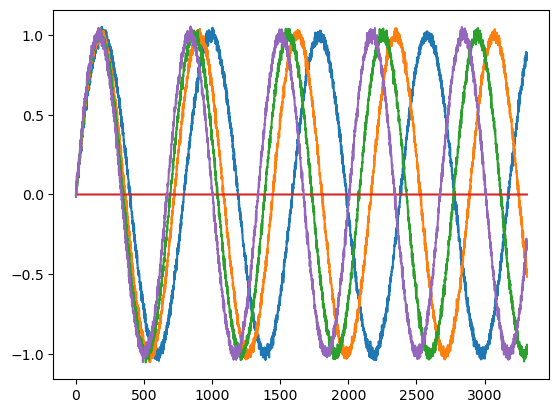

In [19]:
start = 50
plt.plot(dataset["worm0"]["calcium_data"][:, start:start + 5])
plt.show()

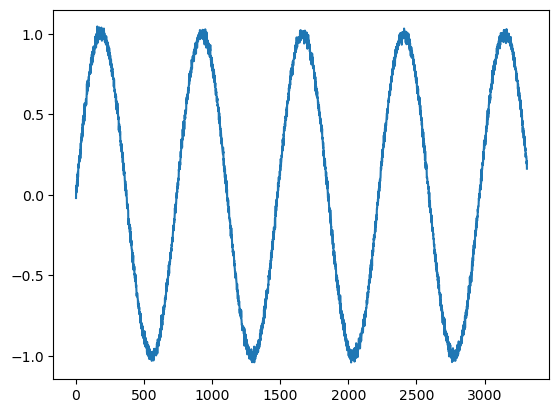

In [15]:
plt.plot(dataset["worm0"]["calcium_data"][:, start + 4])
plt.show()

In [16]:
print(start+4)

14
